In [1]:
# all imports
from necessary_functions import get_numtadb_training_data
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Data Loading

In [2]:
images, labels = get_numtadb_training_data(
    dataset_directory="NumtaDB_Bengali Handwritten Digits/", img_resize_size=(32, 32)
)

Dataset Loading is Complete


In [3]:
# total number of images
print(len(images), len(labels))

72045 72045


In [4]:
np.random.seed(7)
# generate indices for masking and shuffling them
index = list(range(len(labels)))
np.random.shuffle(index)

In [5]:
# now we will take 80% of the data as train set and 20% as test set
train_amount = int(len(labels)*0.8)
X_train = images[index[:train_amount]]
X_test = images[index[train_amount:]]
y_train = labels[index[:train_amount]]
y_test = labels[index[train_amount:]]

The corresponding label is 5


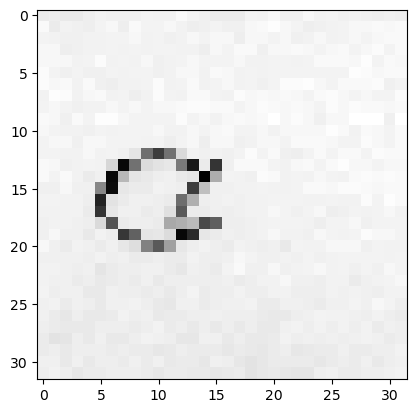

In [6]:
# sanity check 1
plt.imshow(X_train[57], 'gray')
print(f"The corresponding label is {y_train[57]}")

In [7]:
# sanity check 2
print(f"Size of training data are {len(X_train)} and {len(y_train)}")
print(f"Size of testing data are {len(X_test)} and {len(y_test)}")

Size of training data are 57636 and 57636
Size of testing data are 14409 and 14409


# LeNet-5 Model Definition

![LeNet-5 Architecture](The-LeNet-5-Architecture-a-convolutional-neural-network-1505081267.png)

The above figure shows the LeNet-5 Architecture and we are going to implement it using tensorflow

In [2]:
# initializing the model
LeNet5 = tf.keras.models.Sequential()
# definign the input shape
LeNet5.add(tf.keras.layers.Input(shape=(32, 32, 1)))
# C1 layer: 6 filters of 5x5 size with valid padding
LeNet5.add(
    tf.keras.layers.Conv2D(
        filters=6,
        kernel_size=(5, 5),
        strides=(1, 1),
        padding="valid",
        activation="tanh",
    )
)
# S2 layer: average pooling with strides 2 and pool_size of 2x2 and no padding
LeNet5.add(
    tf.keras.layers.AveragePooling2D(
        pool_size=(2, 2),
        strides=(2, 2),
        padding="valid",
    )
)
# C3 layer: 16 filters of 5x5 size with valid padding
LeNet5.add(
    tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=(5, 5),
        strides=(1, 1),
        padding="valid",
        activation="tanh",
    )
)
# S4 layer: average pooling with strides 2 and pool_size of 2x2 and no padding
LeNet5.add(
    tf.keras.layers.AveragePooling2D(
        pool_size=(2, 2),
        strides=(2, 2),
        padding="valid",
    )
)
# C5 layer: a fully connected layer with 120 units
# to connect S4 to C5 we first need to flatten the output of the S4 layer
LeNet5.add(tf.keras.layers.Flatten())
LeNet5.add(tf.keras.layers.Dense(units=120, activation='tanh'))
# F6 layer: a fully connected layer with 84 units
LeNet5.add(tf.keras.layers.Dense(units=84, activation='tanh'))
# OUTPUT layer: layeer with 10 units used to classify the 10 digits
LeNet5.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [10]:
LeNet5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

# Model Training

In [11]:
LeNet5.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

callback_earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = LeNet5.fit(
    X_train, y_train, validation_split=0.2, epochs=100, callbacks=[callback_earlystop],
)  # and 20% of training data is used as validation set

Epoch 1/100
1441/1441 [==============================] - 8s 6ms/step - loss: 2.1947 - accuracy: 0.1883 - val_loss: 2.0258 - val_accuracy: 0.2501
Epoch 2/100
1441/1441 [==============================] - 8s 5ms/step - loss: 1.9325 - accuracy: 0.2974 - val_loss: 1.8490 - val_accuracy: 0.3334
Epoch 3/100
1441/1441 [==============================] - 8s 5ms/step - loss: 1.7478 - accuracy: 0.4066 - val_loss: 1.6756 - val_accuracy: 0.4453
Epoch 4/100
1441/1441 [==============================] - 8s 5ms/step - loss: 1.6149 - accuracy: 0.4681 - val_loss: 1.5867 - val_accuracy: 0.4665
Epoch 5/100
1441/1441 [==============================] - 8s 6ms/step - loss: 1.4809 - accuracy: 0.5165 - val_loss: 1.3966 - val_accuracy: 0.5561
Epoch 6/100
1441/1441 [==============================] - 8s 6ms/step - loss: 1.2819 - accuracy: 0.5908 - val_loss: 1.1723 - val_accuracy: 0.6322
Epoch 7/100
1441/1441 [==============================] - 8s 6ms/step - loss: 1.0908 - accuracy: 0.6523 - val_loss: 1.0240 - val_ac

In [12]:
LeNet5.evaluate(X_test, y_test)

451/451 [==============================] - 1s 3ms/step - loss: 0.3144 - accuracy: 0.9178


[0.31442588567733765, 0.917829155921936]

# Checking performance on mnist dataset

lets check with a standard dataset namely mnist dataset and compare the results

In [4]:
# initializing the model
LeNet5 = tf.keras.models.Sequential()
# definign the input shape
LeNet5.add(tf.keras.layers.Input(shape=(28, 28, 1)))
# C1 layer: 6 filters of 5x5 size with valid padding
LeNet5.add(
    tf.keras.layers.Conv2D(
        filters=6,
        kernel_size=(5, 5),
        strides=(1, 1),
        padding="valid",
        activation="tanh",
    )
)
# S2 layer: average pooling with strides 2 and pool_size of 2x2 and no padding
LeNet5.add(
    tf.keras.layers.AveragePooling2D(
        pool_size=(2, 2),
        strides=(2, 2),
        padding="valid",
    )
)
# C3 layer: 16 filters of 5x5 size with valid padding
LeNet5.add(
    tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=(5, 5),
        strides=(1, 1),
        padding="valid",
        activation="tanh",
    )
)
# S4 layer: average pooling with strides 2 and pool_size of 2x2 and no padding
LeNet5.add(
    tf.keras.layers.AveragePooling2D(
        pool_size=(2, 2),
        strides=(2, 2),
        padding="valid",
    )
)
# C5 layer: a fully connected layer with 120 units
# to connect S4 to C5 we first need to flatten the output of the S4 layer
LeNet5.add(tf.keras.layers.Flatten())
LeNet5.add(tf.keras.layers.Dense(units=120, activation='tanh'))
# F6 layer: a fully connected layer with 84 units
LeNet5.add(tf.keras.layers.Dense(units=84, activation='tanh'))
# OUTPUT layer: layeer with 10 units used to classify the 10 digits
LeNet5.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [5]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
LeNet5.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

callback_earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history2 = LeNet5.fit(
    X_train, y_train, validation_split=0.2, epochs=100, callbacks=[callback_earlystop],
)  # and 20% of training data is used as validation set

Epoch 1/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4720 - accuracy: 0.8875 - val_loss: 0.1870 - val_accuracy: 0.9512
Epoch 2/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1593 - accuracy: 0.9565 - val_loss: 0.1200 - val_accuracy: 0.9682
Epoch 3/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1146 - accuracy: 0.9683 - val_loss: 0.0990 - val_accuracy: 0.9719
Epoch 4/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0944 - accuracy: 0.9735 - val_loss: 0.0829 - val_accuracy: 0.9775
Epoch 5/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0821 - accuracy: 0.9766 - val_loss: 0.0802 - val_accuracy: 0.9753
Epoch 6/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0735 - accuracy: 0.9787 - val_loss: 0.0728 - val_accuracy: 0.9795
Epoch 7/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0673 - accuracy: 0.9805 - val_loss: 0.0653 - val_ac

In [6]:
LeNet5.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0333 - accuracy: 0.9904


[0.03327663987874985, 0.9904000163078308]